<a href="https://colab.research.google.com/github/Sandeepkumar214/Supervised-Learning/blob/main/Concrete_Strength_Prediction_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Concrete is the most important material in civil engineering. The
concrete compressive strength is a highly nonlinear function of age and
ingredients. These ingredients include cement, blast furnace slag, fly ash,
water, superplasticizer, coarse aggregate, and fine aggregate.

Given is the variable name, variable type, the measurement unit and a brief description.
The concrete compressive strength is the regression problem. The order of this listing
corresponds to the order of numerals along the rows of the database.

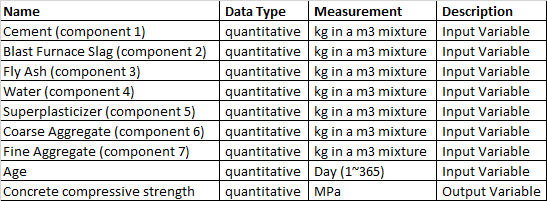

Pipeline

Step1: Data Preprocessing
1. Collection
2. Formatting
3. Labeling

Step2: Feature Extraction
1. Feature Tranformation
2. Feature Engineering
3. Feature Selection

Step3: Modeling
1. Model Building
2. Model Evaluation

Step4: Optimization
1. Prediction Evaluation
2. Model Validation
3. Model Fine Tuning

Step5: Deployment

In [2]:
# Importing Library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats # statistical library

import statsmodels.api as sma # stats models library
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF for multicolinerity
from statsmodels.stats.diagnostic import linear_rainbow # Linear realation via statistics

from sklearn.linear_model import LinearRegression # Gradient descent linear regression
from sklearn.model_selection import train_test_split # Train test split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# UCI Machine Learning Repository library
pip install ucimlrepo


In [4]:
# Fetching data from UCI Machine Learning Repository
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# Read the data
data=pd.concat([concrete_compressive_strength.data.features,concrete_compressive_strength.data.targets],axis=1)


In [5]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Descriptive Statistics

In [6]:
# Categoriacal and numerical columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
# Statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete compressive strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### Univariate Analysis

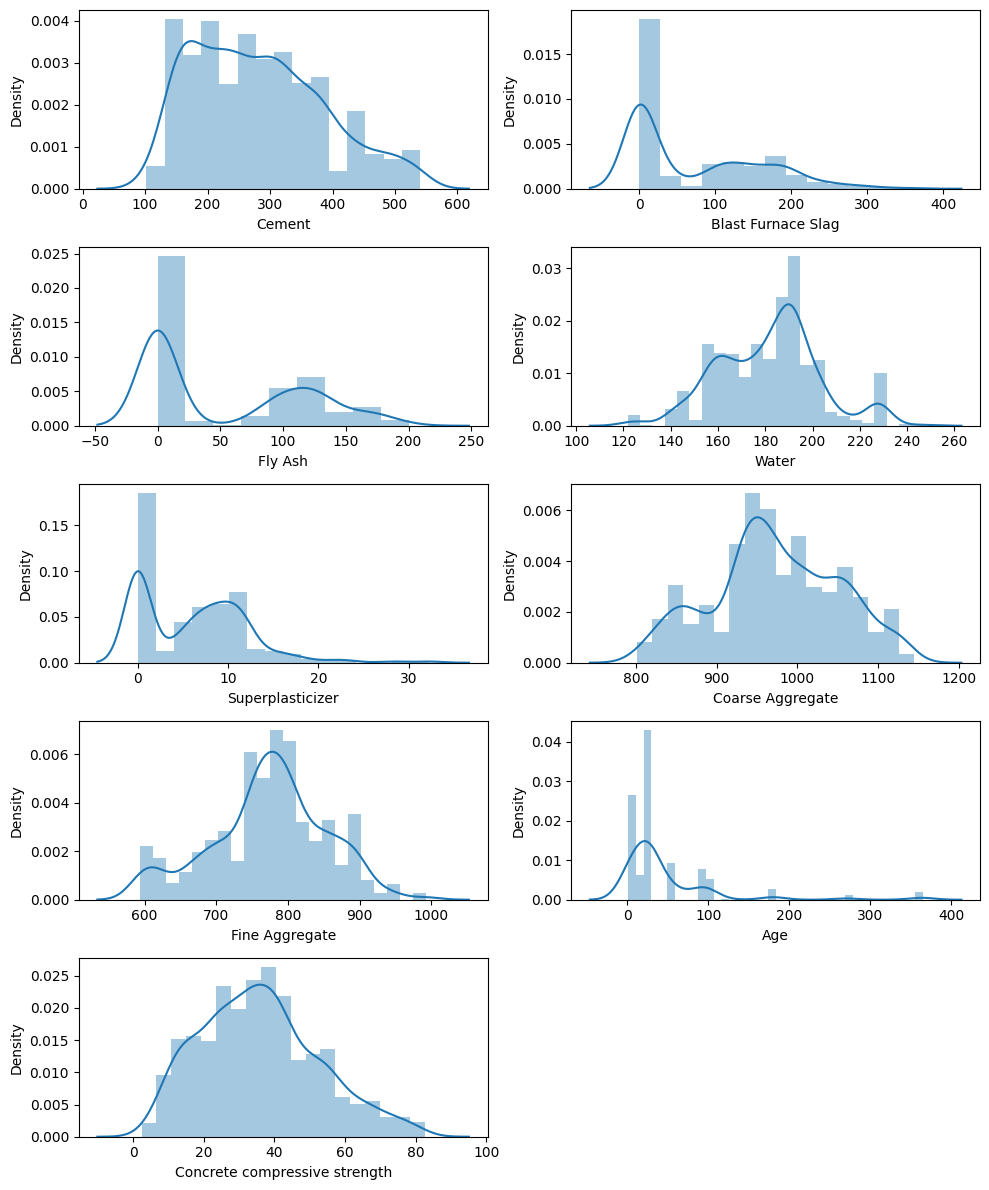

In [8]:
# Distribution of the column
t = 1
plt.figure(figsize=(10,12))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()


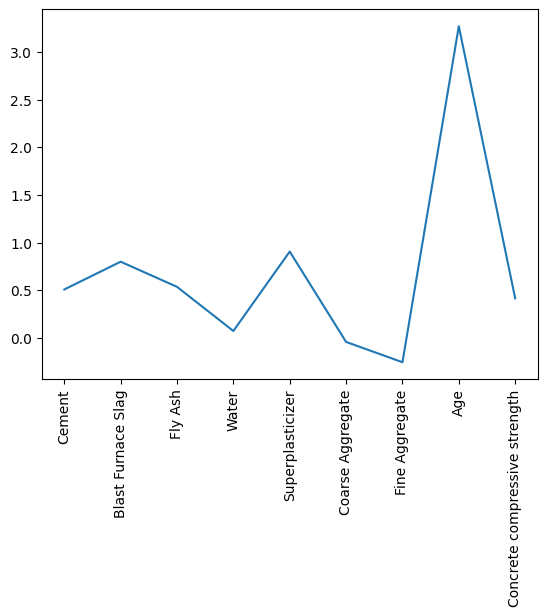

In [9]:
plt.plot(data.columns,data.skew());
plt.xticks(rotation = 90)
plt.show()

cement, blast furnance slag, fly ash , water , superplasticizer , coarse aggregate and concrete compressive strength are approx normally distributed

### Bivariate Analysis with Target Variable


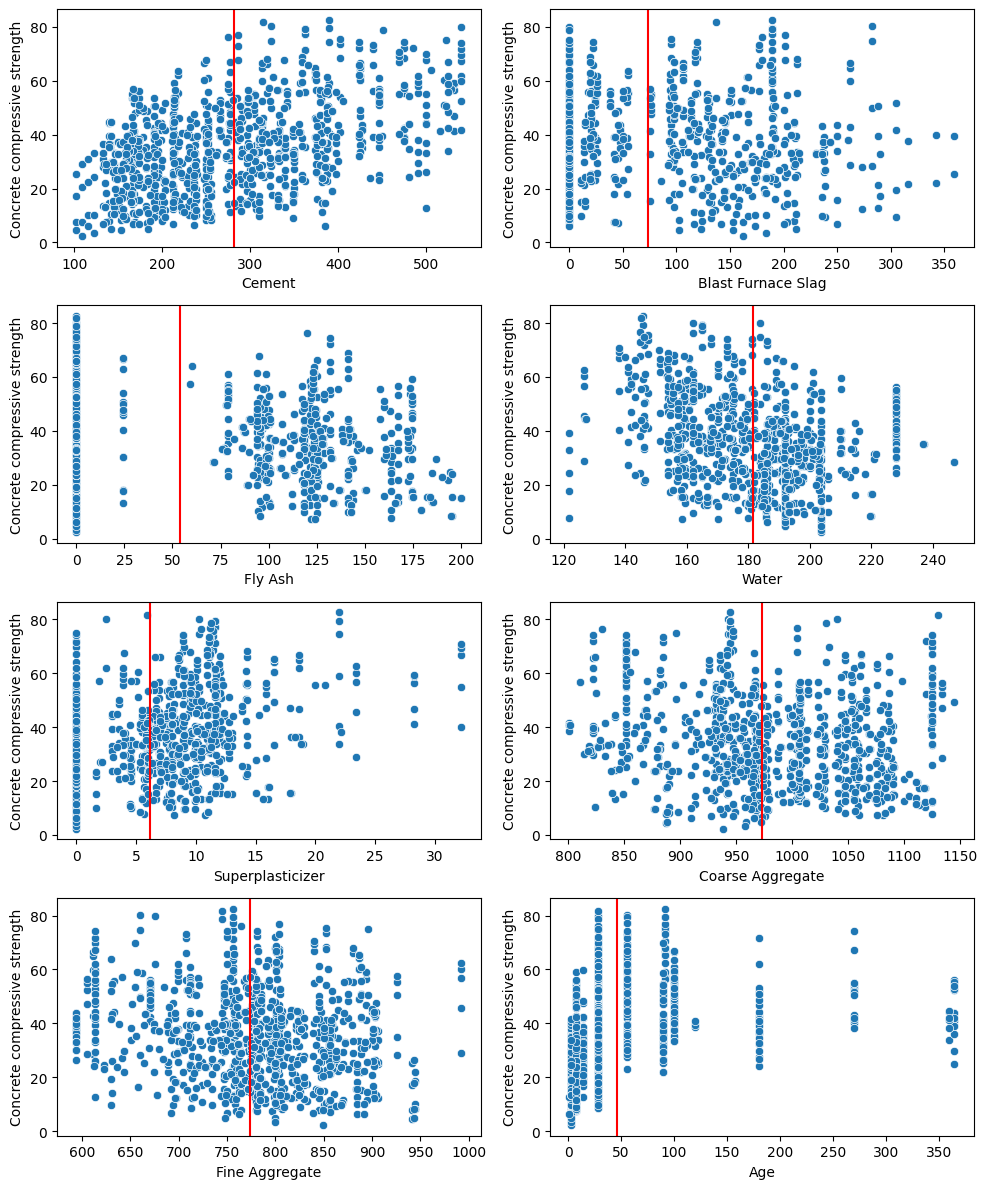

In [10]:
t = 1
plt.figure(figsize=(10,12))
for i in data.columns:
    if i != 'Concrete compressive strength':
        plt.subplot(4,2,t)
        sns.scatterplot(x=data[i],y=data['Concrete compressive strength'])
        plt.axvline(x=data[i].mean(),color='r')

        t+=1
plt.tight_layout()
plt.show()

<Axes: >

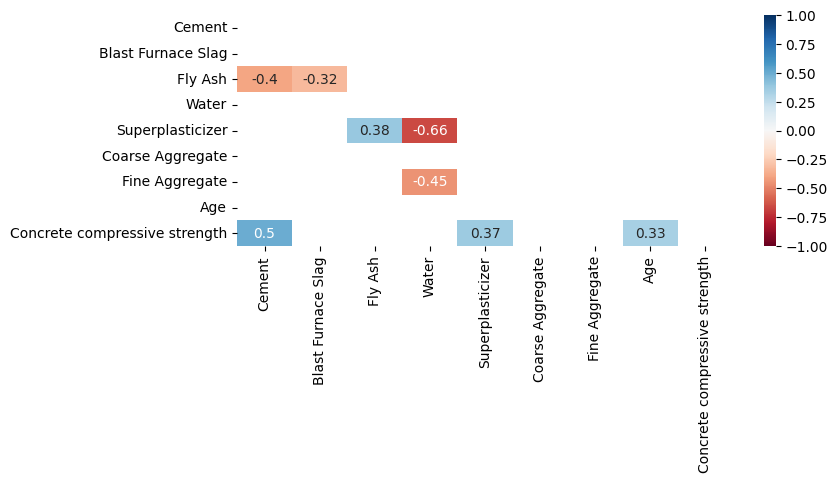

In [11]:
# Correlation heatmap
plt.figure(figsize=(8,3))
sns.heatmap(data.corr()[abs(data.corr())>.3],vmax=1,vmin=-1,cmap='RdBu',annot=True,mask = np.triu(data.corr()))


### Treat the defects in the dataset

In [12]:
# Missing Values
data.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

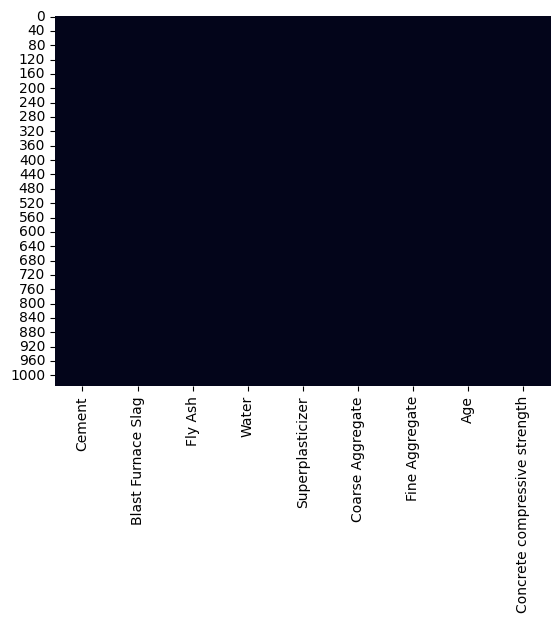

In [13]:

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True'
sns.heatmap(data.isnull(), cbar=False)

# display the plot
plt.show()

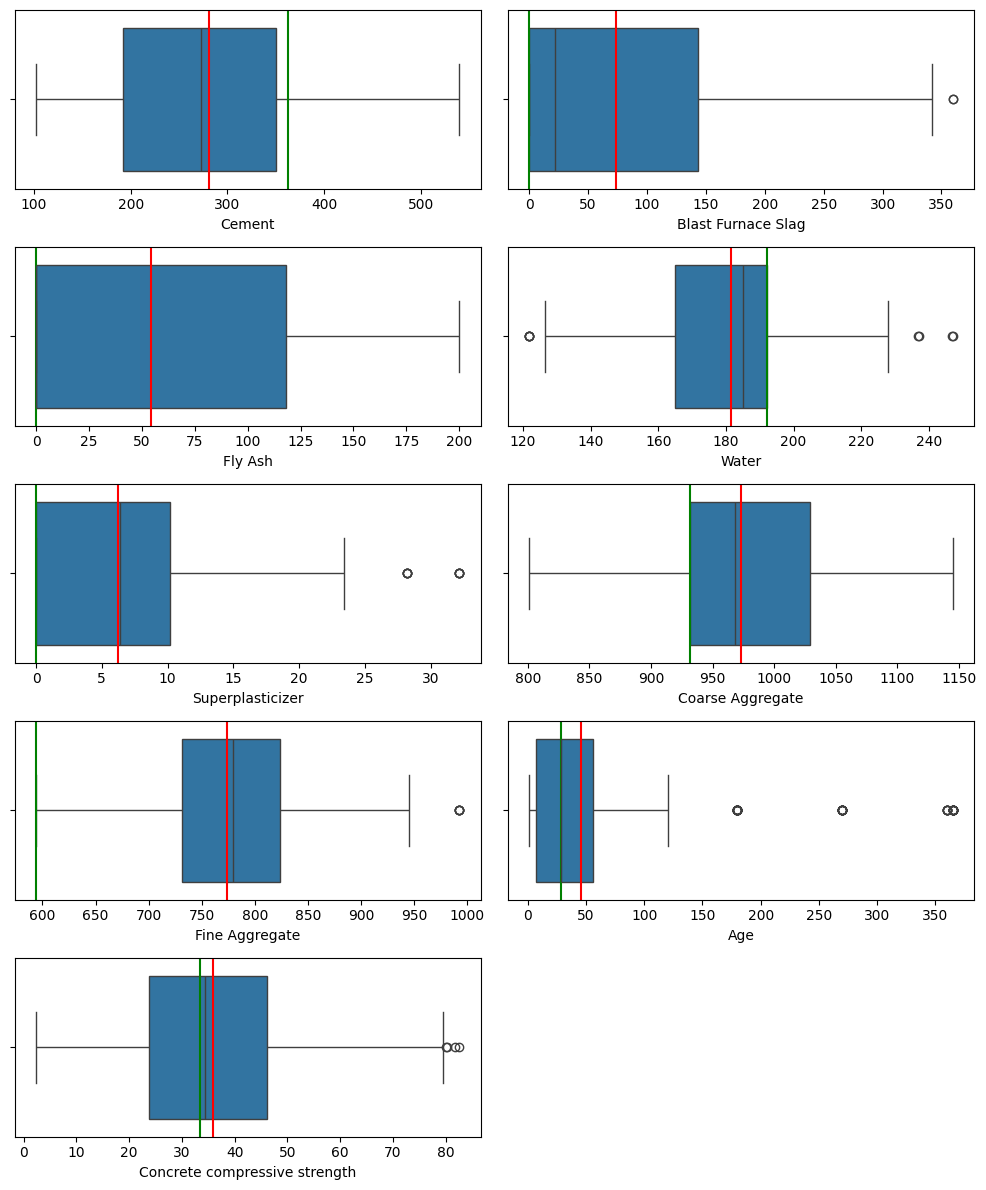

In [14]:
# Do we have Outliers?
t = 1
plt.figure(figsize=(10,12))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(x=data[i],orient='h')
    plt.axvline(x=data[i].mean(),color='r')
    plt.axvline(x=data[i].mode()[0],color='g')
    t+=1
plt.tight_layout()
plt.show()

Since we will be training a linear regression model which is highly sensitive to outliers. We will treat the extreme outliers. Just to see the effect of outliers on the model we build and compare two models one with outliers and one without outliers

In [15]:
# First we will build the model with outliers present in the dataset

x = data.drop(columns=['Concrete compressive strength'])
y = data['Concrete compressive strength']

print(sma.OLS(y,sma.add_constant(x)).fit().summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.616
Model:                                       OLS   Adj. R-squared:                  0.613
Method:                            Least Squares   F-statistic:                     204.3
Date:                           Tue, 30 Apr 2024   Prob (F-statistic):          6.29e-206
Time:                                   13:16:12   Log-Likelihood:                -3869.0
No. Observations:                           1030   AIC:                             7756.
Df Residuals:                               1021   BIC:                             7800.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

**R-squared:** Around 62% of the differences in concrete strength can be explained by the things we measured.


In [16]:
# Lets remove the outliers

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
data = data.loc[~((data>ul)|(data<ll)).any(axis=1)] # assigning data to dataframe that have treated outliers

In [17]:
# Model without outliers present in the dataset
x = data.drop(columns=['Concrete compressive strength'])
y = data['Concrete compressive strength']

print(sma.OLS(y,sma.add_constant(x)).fit().summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.770
Model:                                       OLS   Adj. R-squared:                  0.768
Method:                            Least Squares   F-statistic:                     390.1
Date:                           Tue, 30 Apr 2024   Prob (F-statistic):          2.75e-291
Time:                                   13:16:12   Log-Likelihood:                -3286.4
No. Observations:                            941   AIC:                             6591.
Df Residuals:                                932   BIC:                             6634.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

**R-squared:** The second model has a higher R-squared value (0.770) compared to the first model (0.616). This means the second model explains more of the variance in concrete compressive strength.

**Adjusted R-squared:** Similarly, the adjusted R-squared is higher for the second model (0.768) compared to the first model (0.613).

**F-statistic:** The F-statistic for the second model (390.1) is higher than that of the first model (204.3), indicating that the second model is more statistically significant.

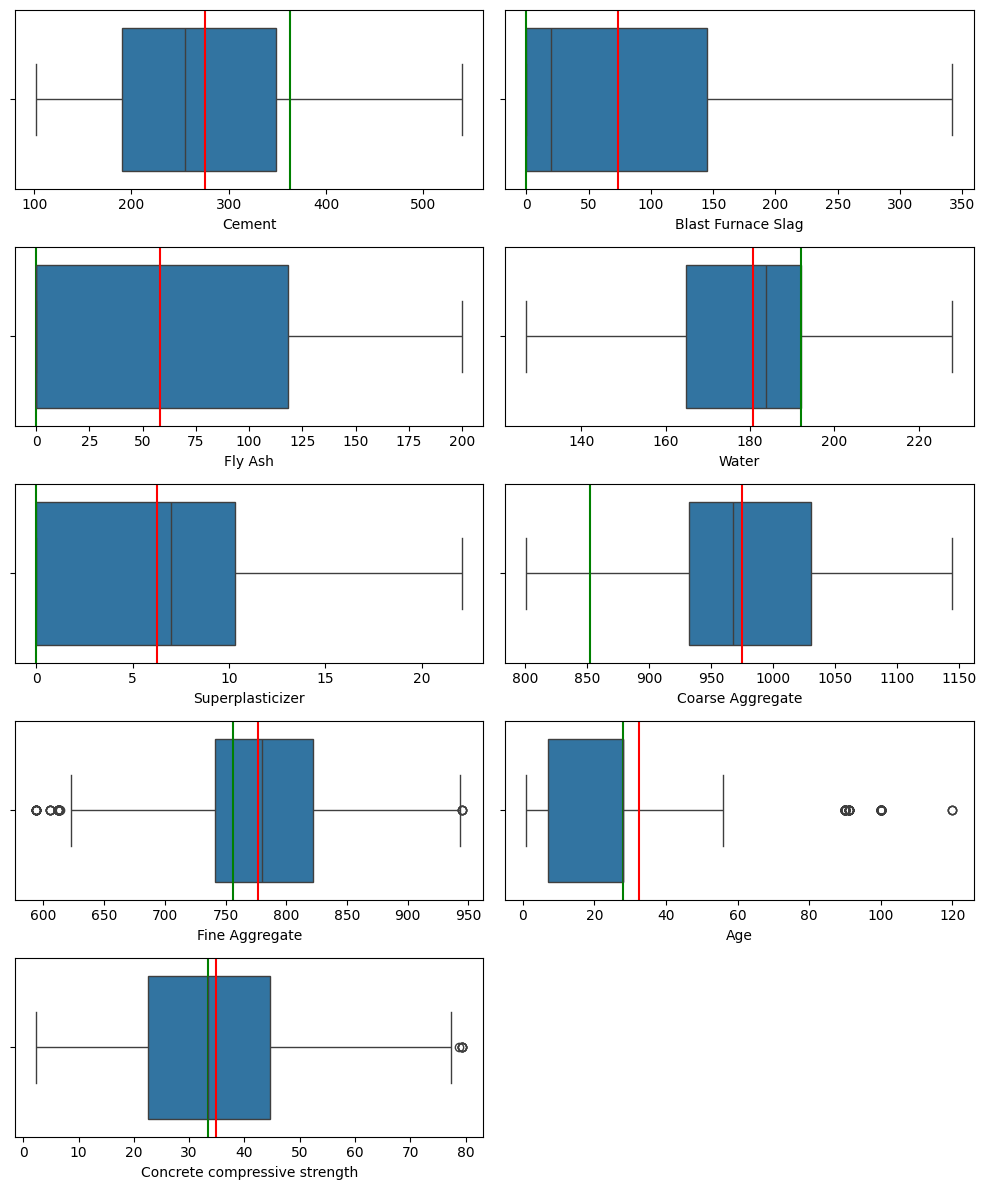

In [18]:
# checking again outliers
t = 1
plt.figure(figsize=(10,12))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(x=data[i],orient='h')
    plt.axvline(x=data[i].mean(),color='r')
    plt.axvline(x=data[i].mode()[0],color='g')
    t+=1
plt.tight_layout()
plt.show()

### Feature Engineering

In [19]:
# Feature Engineering
# Instead of taking water and cement lets take cement to water ratio

x['Cem_Wat_ratio'] = x['Cement']/x['Water']

x.drop(columns=['Cement','Water'],inplace=True)

x.head()

,Blast Furnace Slag,Fly Ash,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Cem_Wat_ratio
1,0.0,0.0,2.5,1055.0,676.0,28,3.333333
5,114.0,0.0,0.0,932.0,670.0,90,1.166667
7,95.0,0.0,0.0,932.0,594.0,28,1.666667
8,114.0,0.0,0.0,932.0,670.0,28,1.166667
9,0.0,0.0,0.0,932.0,594.0,28,2.083333


In [20]:
x['coarse_fine_ratio'] = x['Coarse Aggregate']/x['Fine Aggregate']

x.drop(columns=['Coarse Aggregate','Fine Aggregate'],inplace=True)

x.head()

,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,Cem_Wat_ratio,coarse_fine_ratio
1,0.0,0.0,2.5,28,3.333333,1.560651
5,114.0,0.0,0.0,90,1.166667,1.391045
7,95.0,0.0,0.0,28,1.666667,1.569024
8,114.0,0.0,0.0,28,1.166667,1.391045
9,0.0,0.0,0.0,28,2.083333,1.569024


### Building a base model

In [21]:
base_model= sma.OLS(y,sma.add_constant(x)).fit()
print(base_model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.763
Model:                                       OLS   Adj. R-squared:                  0.761
Method:                            Least Squares   F-statistic:                     501.1
Date:                           Tue, 30 Apr 2024   Prob (F-statistic):          6.81e-288
Time:                                   13:16:14   Log-Likelihood:                -3300.6
No. Observations:                            941   AIC:                             6615.
Df Residuals:                                934   BIC:                             6649.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

## Statistical Analysis for Linear Regression

* Assumption 1: Target Must be numeric
* Assumption 2: There should be no multicoliniarity
* Assumption 3: Linear relation among variables
* Assumption 4: There should be no autocorrelation
* Assumption 5: The residual must be homoscedastic
* Assumption 6: Residual must be normal

Text(0.5, 1.0, 'Skew : 0.45 , kurt : -0.32, Mean : 34.89 ,SD : 16.59 ')

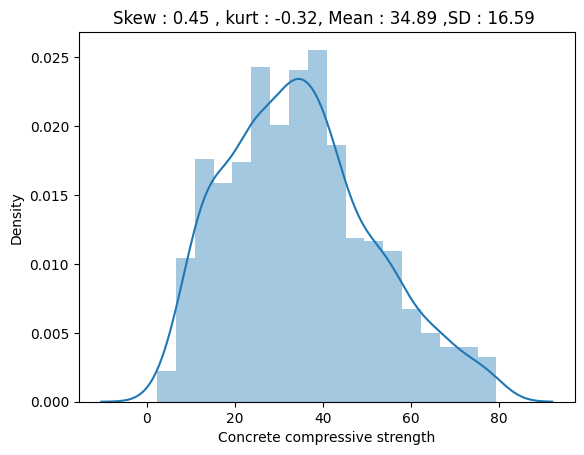

In [22]:

# Assumption 1: Target Must be numeric and  normally distributed

sns.distplot(y);
plt.title(f'Skew : {round(y.skew(),2)} , kurt : {round(y.kurt(),2)}, Mean : {round(y.mean(),2)} ,SD : {round(y.std(),2)} ')

* Target Varible is near to Normal Disribution and shape is mesokurtic.
* The variable has mean 34.89 and has standard deviation 16.59 .
* It mean target variable has no extreme values

In [23]:
# Assumption 2: There should be no multicoliniarity

# VIF

vif_list = []

for i in range(x.shape[1]):
  vif_list.append(variance_inflation_factor(x.values,i))


pd.DataFrame({'Feature Name':x.columns,'VIF':vif_list}).\
sort_values(by='VIF',ascending=False)

,Feature Name,VIF
5,coarse_fine_ratio,18.737392
4,Cem_Wat_ratio,13.373796
2,Superplasticizer,5.187640
1,Fly Ash,4.525585
0,Blast Furnace Slag,2.972672
3,Age,2.246832


coarse_fine_ratio	18.73739	and Cem_Wat_ratio	13.373796 have high multicolinearity

In [24]:
# In order to deal with multicolinearity we need to remove columns one by
# one and check the scores of the model

# Model without coarse fine ration : negligible drop

x_c = sma.add_constant(x)

sma.OLS(y,x_c.drop(columns=['coarse_fine_ratio'])).fit().rsquared

0.7629656053590728

In [25]:
# Model without cement water ratio : negligible drop

sma.OLS(y,x_c.drop(columns=['Cem_Wat_ratio'])).fit().rsquared

0.5075091953123179

In [26]:
# Lets drop coarge fine ratio from the model and calculate the VIF again

x.drop(columns=['coarse_fine_ratio'],inplace=True)

vif_list=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

pd.DataFrame({'Feature Name':x.columns,'VIF':vif_list}).\
sort_values(by='VIF',ascending=False)

,Feature Name,VIF
2,Superplasticizer,3.933928
4,Cem_Wat_ratio,3.116529
1,Fly Ash,2.421427
3,Age,2.128007
0,Blast Furnace Slag,1.612344


building model by above features only

#### Model 1

In [27]:
model_1 = sma.OLS(y,sma.add_constant(x)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete compressive strength   R-squared:                       0.763
Model:                                       OLS   Adj. R-squared:                  0.762
Method:                            Least Squares   F-statistic:                     601.9
Date:                           Tue, 30 Apr 2024   Prob (F-statistic):          2.70e-289
Time:                                   13:16:15   Log-Likelihood:                -3300.6
No. Observations:                            941   AIC:                             6613.
Df Residuals:                                935   BIC:                             6642.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.4790      1.248    -13.210      0.000     -18.927     -14.031
Blast Furnace Slag     0.0796      0.004     19.586      0.000       0.072       0.088
Fly Ash                0.0600      0.007      9.044      0.000       0.047       0.073
Superplasticizer       0.2890      0.070      4.120      0.000       0.151       0.427
Age                    0.3122      0.009     33.640      0.000       0.294       0.330
Cem_Wat_ratio         19.4112      0.596     32.548      0.000      18.241      20.582
==============================================================================
Omnibus:                        7.740   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.387
Skew:                           0.156   Prob(JB):                       0.0151
Kurtosis:                       3.341   Cond. No.                         619.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

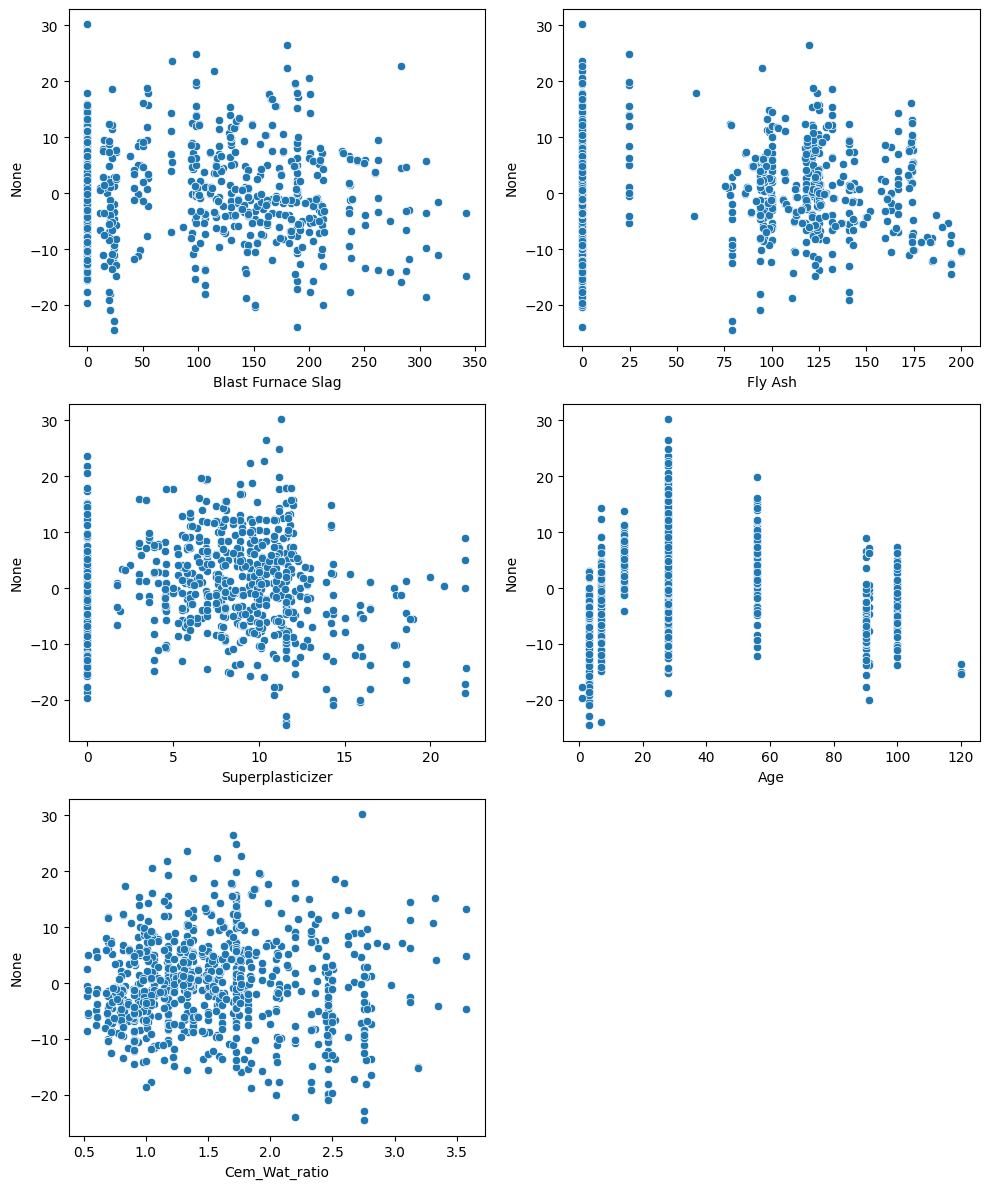

In [28]:
# Assumption 3: Linear relation among variables

# Plot residual vs ind variables
plt.figure(figsize=(10,12))
t=1
for i in x.columns:
    plt.subplot(3,2,t)
    sns.scatterplot(x=x[i],y=model_1.resid)
    t+=1
plt.tight_layout()
plt.show()

In [29]:
# Rainbow to check liniarity
# Ho: Variables are linear
# Ha: Variables are not linear

p_value = linear_rainbow(model_1)[1]

if p_value < 0.05:
    print('Reject Ho: Variables are not linear')
else:
    print('Faul to reject Ho: Variables are linear')

Faul to reject Ho: Variables are linear


In [30]:
# Assumption 4: There should be no autocorrelation

# d = 1.271

Since durbin watson statistic is less than 1.5 < d < 2.5 we can say that there is some positive autocorrelation in the dataset

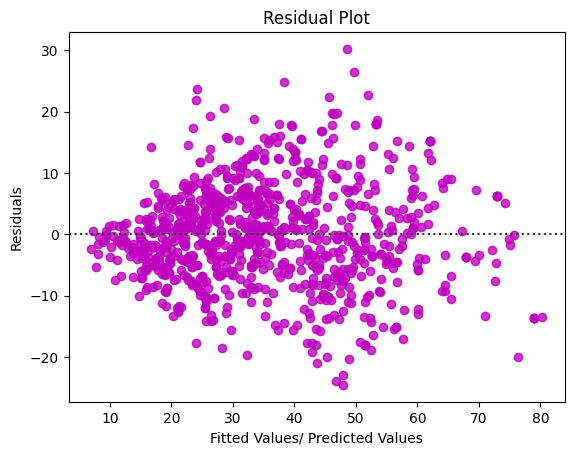

In [31]:
# Assumption 5: The residual must be homoscedastic

sns.residplot(x=model_1.fittedvalues,y=model_1.resid,color='m')
plt.xlabel('Fitted Values/ Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [32]:
# Breusch Pagan test

# Ho: The varinces are same: Homoscedastic
# Ha: The variances are not same: Hetroscedastic

p_value = sma.stats.diagnostic.het_breuschpagan(model_1.resid,
                                                model_1.model.exog)[1]


if p_value<0.05:
    print('Reject Ho: Residual are Hetroscedastic')
else:
    print('Fail to reject Ho: Residual are Homoscedastic')

Reject Ho: Residual are Hetroscedastic


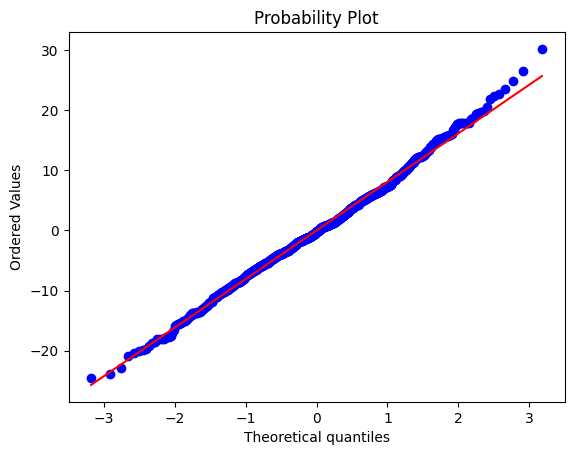

In [33]:
# Assumption 6: Residual must be normal

# qq plot

stats.probplot(model_1.resid,plot=plt)
plt.show()

In [34]:
stats.shapiro(model_1.resid)

ShapiroResult(statistic=0.9963069558143616, pvalue=0.02548024244606495)

In [35]:
p_value=stats.shapiro(model_1.resid).pvalue
if p_value<.05:
  print('reject H0: The data is not normally distributed ')
else:
  print('Faied to Reject H0: The data is normally distributed')


reject H0: The data is not normally distributed 


But we can say that residual are approximatly normal

## Business Interpretation

<Axes: >

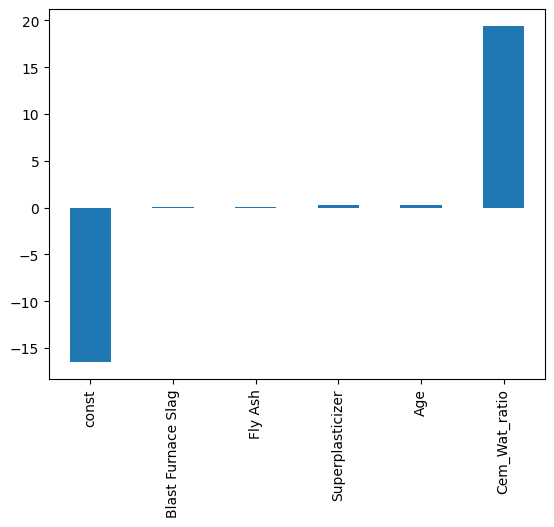

In [36]:
# Coffients importance
model_1.params.plot(kind='bar')

In [37]:
print(model_1.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.763
Model:                                       OLS   Adj. R-squared:                  0.762
Method:                            Least Squares   F-statistic:                     601.9
Date:                           Tue, 30 Apr 2024   Prob (F-statistic):          2.70e-289
Time:                                   13:16:17   Log-Likelihood:                -3300.6
No. Observations:                            941   AIC:                             6613.
Df Residuals:                                935   BIC:                             6642.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [38]:
# dataframe for p_values to find significant columns
pd.DataFrame(model_1.pvalues,columns=['p_values'])

,p_values
const,1.187324e-36
Blast Furnace Slag,7.624358e-72
Fly Ash,8.561519e-19
Superplasticizer,4.128523e-05
Age,3.268031e-163
Cem_Wat_ratio,5.582923e-156


In [39]:
significant_attributes=pd.DataFrame(model_1.pvalues,columns=['p_values'])\
 [pd.DataFrame(model_1.pvalues,columns=['p_values'])['p_values']<.05].index

print(f'significant_attributes:{list(significant_attributes)} \n no of significcant columns :{len(significant_attributes)}')

significant_attributes:['const', 'Blast Furnace Slag', 'Fly Ash', 'Superplasticizer', 'Age', 'Cem_Wat_ratio'] 
 no of significcant columns :6


In [40]:
insignificant_attributes=pd.DataFrame(model_1.pvalues,columns=['p_values'])\
 [pd.DataFrame(model_1.pvalues,columns=['p_values'])['p_values']>.05].index

print(f'insignificant_attributes:{list(insignificant_attributes)} \n no of insignificcant columns :{len(insignificant_attributes)}')

insignificant_attributes:[] 
 no of insignificcant columns :0


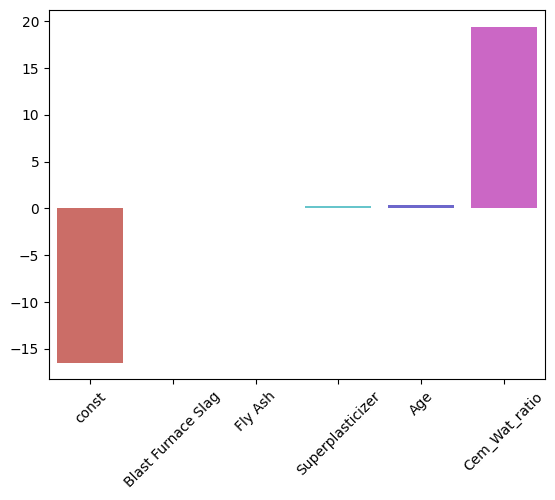

In [41]:
sns.barplot(data=model_1.params, palette='hls');
plt.xticks(rotation=45);

1. All the features are significant features
2. The intercept being -16.4837 is absurd because -ve comp strength makes no sense.
3. One unit increase in cem/water ratio increases the strength by 19 Mpa
4. If the concrete ages by 1 day there is increase in strength by 0.3122 Mpa
5. Adding a superplacticizer by 1 unit increase the strength by 0.2879 Mpa

### Predictive Modeling

> By Gradient descent



In [42]:
# scaling
from sklearn.preprocessing import StandardScaler
sr=StandardScaler()
x_scaled=pd.DataFrame(sr.fit_transform(x),columns=x.columns)

y_scaled=pd.DataFrame(sr.fit_transform(y.values.reshape(-1,1)))
x_scaled.shape,y_scaled.shape

((941, 5), (941, 1))

In [43]:
# Re-Fitted Model on train dataset

# lets split the data into train and test

In [44]:
# data split into train test
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_scaled,train_size=0.7,
                                                 random_state=1)

In [45]:
# shape of train test
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(658, 5) (283, 5) (658, 1) (283, 1)


In [46]:
# linear regression instance and  fitting of the model
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)  # Training a model

LinearRegression()

In [47]:
# prediciton
y_pred = model_lr.predict(x_test)

In [48]:
# Metrics performance of the model
print('Test Data')
print('R-Squared:',r2_score(y_test,y_pred))

r2 = r2_score(y_test,y_pred)
n = len(y_test)
k = x_test.shape[1]

print('Adjusted R2:',1-(((1-r2)*(n-1))/(n-k-1)))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))

test=[r2_score(y_test,y_pred),1-(((1-r2)*(n-1))/(n-k-1)),mean_squared_error(y_test,y_pred),
 np.sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_error(y_test,y_pred),
 mean_absolute_percentage_error(y_test,y_pred)]

Test Data
R-Squared: 0.7576951284212785
Adjusted R2: 0.7533213942772583
MSE: 0.234106942798143
RMSE: 0.4838459907844055
MAE: 0.37230987966127643
MAPE: 4.461239214429265


In [49]:
print('Train Data')
y_pred = model_lr.predict(x_train)
print('R-Squared:',r2_score(y_train,y_pred))

r2 = r2_score(y_train,y_pred)
n = len(y_train)
k = x_train.shape[1]

print('Adjusted R2:',1-(((1-r2)*(n-1))/(n-k-1)))
print('MSE:',mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train,y_pred)))
print('MAE:',mean_absolute_error(y_train,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred))

train=[r2_score(y_train,y_pred),1-(((1-r2)*(n-1))/(n-k-1)),mean_squared_error(y_train,y_pred),
np.sqrt(mean_squared_error(y_train,y_pred)),mean_absolute_error(y_train,y_pred),
 mean_absolute_percentage_error(y_train,y_pred)]

Train Data
R-Squared: 0.7638791056688395
Adjusted R2: 0.7620683626141527
MSE: 0.2393628963768226
RMSE: 0.48924727528809253
MAE: 0.38400761577023695
MAPE: 1.4141162852725762


<Axes: >

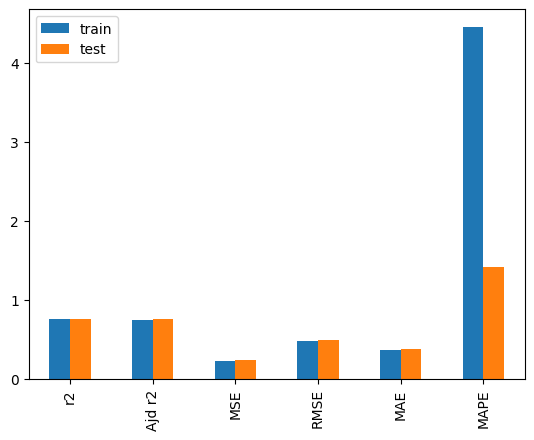

In [50]:
# compare test and train results to visualize is model is overfit or under fit
pd.DataFrame([test,train],columns=['r2','Ajd r2','MSE','RMSE','MAE','MAPE'],index=['train','test']).T.plot(kind='bar')


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(estimator=LinearRegression(),X=x_train,y=y_train,cv=10,scoring='r2',verbose=3)

[CV] END ................................ score: (test=0.773) total time=   0.0s
[CV] END ................................ score: (test=0.763) total time=   0.0s
[CV] END ................................ score: (test=0.710) total time=   0.0s
[CV] END ................................ score: (test=0.776) total time=   0.0s
[CV] END ................................ score: (test=0.785) total time=   0.0s
[CV] END ................................ score: (test=0.774) total time=   0.0s
[CV] END ................................ score: (test=0.773) total time=   0.0s
[CV] END ................................ score: (test=0.829) total time=   0.0s
[CV] END ................................ score: (test=0.740) total time=   0.0s
[CV] END ................................ score: (test=0.612) total time=   0.0s


In [52]:
cross_val.mean()

0.7532658321936068

#### this model is able to explain 75% of variation in the model


In [53]:
# Column Selection technique

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# initiate linear regression model to use in feature selection
linreg = LinearRegression()


# build step forward selection
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True,
                     verbose = 1, scoring = 'r2').fit(x_train,y_train)



Features: 5/5

In [54]:
_# printing the selected feature names when k_features = 'best'
print('Features selelected using forward selection are: ')
print(linreg_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', linreg_forward.k_score_)

Features selelected using forward selection are: 
('Blast Furnace Slag', 'Fly Ash', 'Superplasticizer', 'Age', 'Cem_Wat_ratio')

R-Squared:  0.7537105127109329


In [55]:
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False,
                     verbose = 2, scoring = 'r2').fit(x_train,y_train)


[2024-04-30 13:16:18] Features: 4/1 -- score: 0.7511194490940899
[2024-04-30 13:16:19] Features: 3/1 -- score: 0.6811072609229711
[2024-04-30 13:16:19] Features: 2/1 -- score: 0.5809715883455897
[2024-04-30 13:16:19] Features: 1/1 -- score: 0.2818183174991952

In [56]:
_# printing the selected feature names when k_features = 'best'
print('Features selelected using backward selection are: ')
print(linreg_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', linreg_backward.k_score_)

Features selelected using backward selection are: 
('Blast Furnace Slag', 'Fly Ash', 'Superplasticizer', 'Age', 'Cem_Wat_ratio')

R-Squared:  0.7537105127109329


In [57]:
# metrics for model test
from sklearn.metrics import r2_score,\
mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [84]:
# function for the best algorithm
me=[]
r2=[]
mse=[]
mae=[]
mape=[]

def model_scores(xtrain,xtest,ytrain,ytest,model):
    m=model
    m.fit(xtrain,ytrain)
    pred=m.predict(xtest)
    me.append(str(model))
    r2.append(r2_score(ytest,pred))
    mse.append(mean_absolute_error(ytest,pred))
    mae.append(mean_absolute_error(ytest,pred))
    mape.append(mean_absolute_percentage_error(ytest,pred))
    global model_summary
    model_summary=pd.DataFrame({'Model':me,'rsqaure':r2,'mse':mse,'mae':mae,'mape':mape})



In [85]:
# Importing algorithms
from sklearn.ensemble import AdaBoostRegressor,\
BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [86]:
k=[LinearRegression(),AdaBoostRegressor(),BaggingRegressor(),GradientBoostingRegressor(),
   RandomForestRegressor(),DecisionTreeRegressor(),XGBRegressor()]


In [87]:
for i in k:
    model_scores(x_train,x_test,y_train,y_test,i)

In [88]:

model_summary

,Model,rsqaure,mse,mae,mape
0,LinearRegression(),0.757695,0.372310,0.372310,4.461239
1,AdaBoostRegressor(),0.760088,0.397967,0.397967,5.160458
2,BaggingRegressor(),0.852664,0.269105,0.269105,5.973200
3,GradientBoostingRegressor(),0.863192,0.267100,0.267100,5.420160
4,RandomForestRegressor(),0.867958,0.253467,0.253467,5.503324
5,DecisionTreeRegressor(),0.822129,0.282728,0.282728,7.049111
6,"XGBRegressor(base_score=None, booster=None, ca...",0.879375,0.230126,0.230126,5.898547


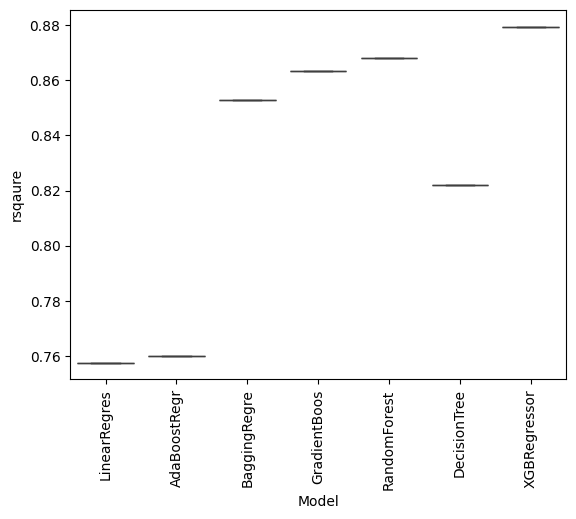

In [89]:
# best model performer is XGBoost regressor
sns.boxplot(x=model_summary['Model'].apply(lambda x:x[:12]),y=model_summary['rsqaure']);
plt.xticks(rotation=90);

In [64]:
# Stacking Model

from sklearn.ensemble import StackingRegressor

rf = RandomForestRegressor()

xgbm = XGBRegressor()

gbr = GradientBoostingRegressor()

stack = StackingRegressor(estimators = [ ("rf", rf),
 ("gbr", gbr)],final_estimator = xgbm)

prediction = stack.fit(x_train, y_train).predict(x_test)
r2_score(y_test,prediction)

0.834447072910416

In [65]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

ridge=Ridge(alpha=.1,max_iter=500).fit(x_train,y_train)

r2_score(y_test,ridge.predict(x_test))

0.7577042988581675

<Axes: >

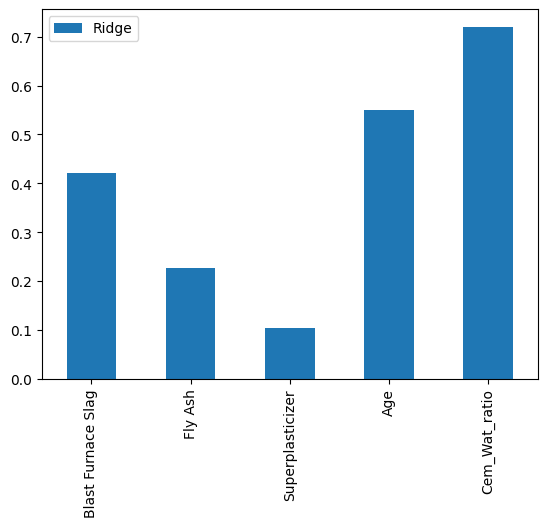

In [122]:

rico=pd.DataFrame(ridge.coef_.T,index=x_train.columns,columns=['Ridge'])
pd.DataFrame(ridge.coef_.T,index=x_train.columns,columns=['Ridge']).plot(kind='bar')

In [67]:

lasso=Lasso(alpha=.1,max_iter=500).fit(x_train,y_train)

r2_score(y_test,lasso.predict(x_test))


0.7110631230568819

<Axes: >

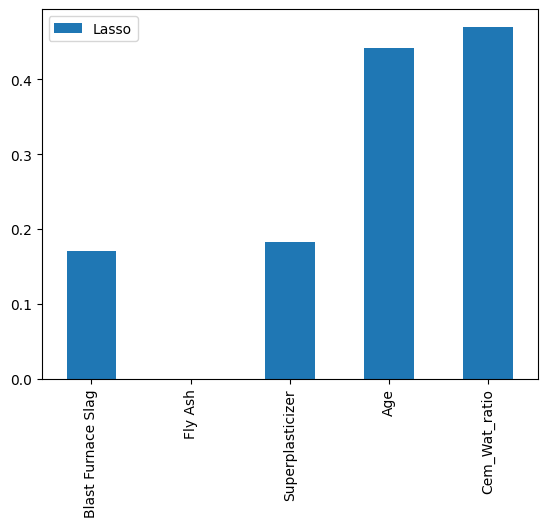

In [123]:
loco=pd.DataFrame(lasso.coef_.T,index=x_train.columns,columns=['Lasso'])
pd.DataFrame(lasso.coef_.T,index=x_train.columns,columns=['Lasso']).plot(kind='bar')

In [69]:

en=ElasticNet(alpha=.1,max_iter=500).fit(x_train,y_train)

r2_score(y_test,en.predict(x_test))

0.7273064664363598

<Axes: >

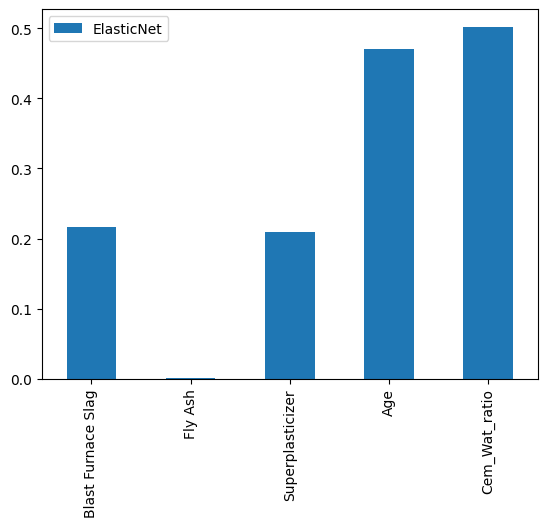

In [125]:
enco=pd.DataFrame(en.coef_.T,index=x_train.columns,columns=['ElasticNet'])
pd.DataFrame(en.coef_.T,index=x_train.columns,columns=['ElasticNet']).plot(kind='bar')

<Axes: >

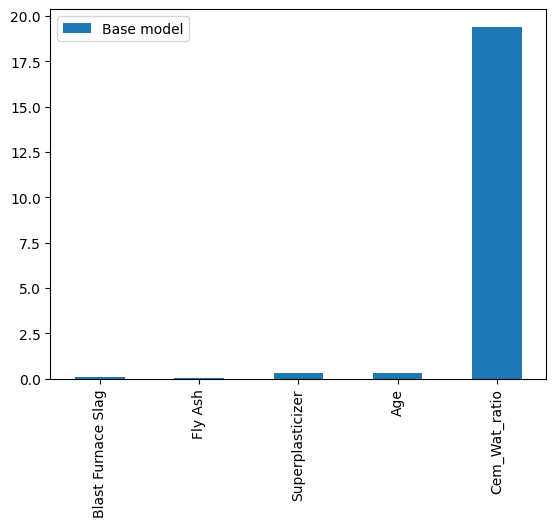

In [127]:
base_model1=pd.DataFrame(model_1.params,index=x_train.columns,columns=['Base model'])

pd.DataFrame(model_1.params,index=x_train.columns,columns=['Base model']).plot(kind='bar')


In [73]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# 1. Define the model
model = XGBRegressor( random_state=42)

# 2. Define the parameter grid
param_grid = {
    "colsample_bytree": [0.3, 0.4, 0.5],
    "gamma": [0, 0.25, 0.5],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [4, 5, 6],
    "n_estimators": [100, 150, 200],
}

# 3. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,scoring='r2')

# 4. Fit the data
grid_search.fit(x_train, y_train)

# 5. Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# 6. Get the best model
best_model = grid_search.best_estimator_


Best parameters: {'colsample_bytree': 0.4, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


NameError: name '_test' is not defined

In [74]:

# 7. Evaluate the best model
best_model_score = best_model.score(x_test, y_test)
print("Best model score:", best_model_score)

Best model score: 0.8818449012750804


colsample_bytree: This parameter controls the fraction of features to be used for each tree. A smaller value helps to prevent overfitting.

gamma: This parameter controls the minimum loss reduction required to make a split in a tree. A larger value makes the model more conservative and helps to prevent overfitting.

learning_rate: This parameter controls the step size used to update the model in each iteration. A smaller learning rate leads to slower learning but can help to prevent overfitting.

max_depth: This parameter controls the maximum depth of each tree. A larger depth allows for more complex decision boundaries but can also lead to overfitting.

n_estimators: This parameter controls the number of trees in the model. A larger number of trees can improve the model's accuracy but also increases the computational cost.

In [75]:
best_params

{'colsample_bytree': 0.4,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 200}

In [92]:
final_model=XGBRegressor(colsample_bytree =0.4,gamma= 0,learning_rate=0.1,max_depth=4,n_estimators=200)


In [93]:
model_scores(x_train,x_test,y_train,y_test,final_model)

In [94]:
model_summary

,Model,rsqaure,mse,mae,mape
0,LinearRegression(),0.757695,0.372310,0.372310,4.461239
1,AdaBoostRegressor(),0.760088,0.397967,0.397967,5.160458
2,BaggingRegressor(),0.852664,0.269105,0.269105,5.973200
3,GradientBoostingRegressor(),0.863192,0.267100,0.267100,5.420160
4,RandomForestRegressor(),0.867958,0.253467,0.253467,5.503324
5,DecisionTreeRegressor(),0.822129,0.282728,0.282728,7.049111
6,"XGBRegressor(base_score=None, booster=None, ca...",0.879375,0.230126,0.230126,5.898547
7,"XGBRegressor(base_score=None, booster=None, ca...",0.877842,0.246565,0.246565,4.219985
8,"XGBRegressor(base_score=None, booster=None, ca...",0.880954,0.247304,0.247304,3.467802


In [98]:
final_model=XGBRegressor(colsample_bytree =0.4,gamma= 0,learning_rate=0.1,max_depth=4,n_estimators=200).fit(x_train,y_train)

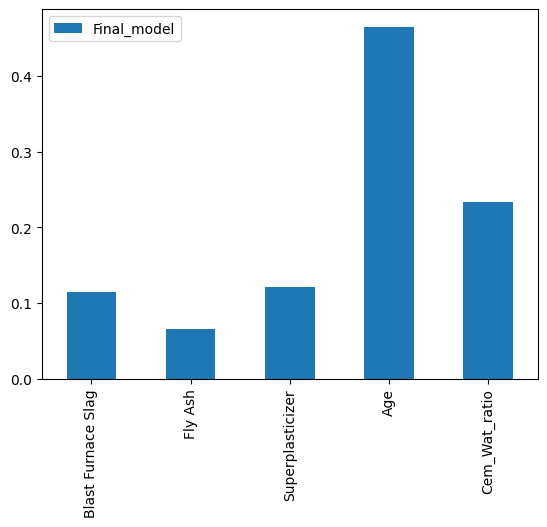

In [119]:
fnco=pd.DataFrame(final_model.feature_importances_,index=x.columns,columns=['Final_model'])
fnco.plot(kind='bar');

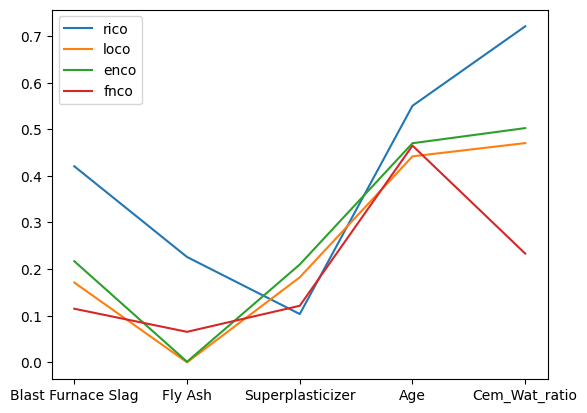

In [155]:
coff_lis=[rico,loco,enco,fnco]

for i in coff_lis:
  plt.plot(i)
  plt.legend(['rico','loco','enco','fnco'])


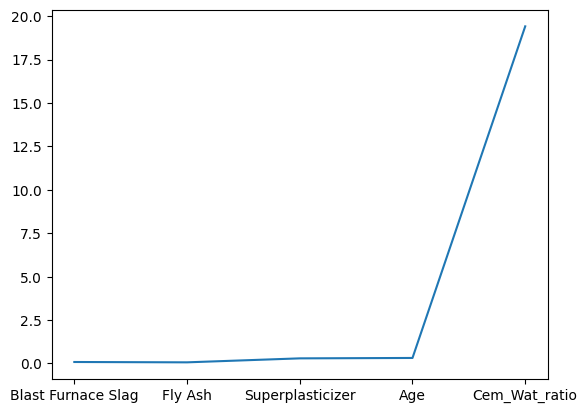

In [157]:

plt.plot(base_model1)

plt.show()


As base model is consideing only one feature Cem_water_ratio
as final model is considering all the features and considering Age is most important




For cement the most important thing is the cement water ratio and age of that material to predict the strength of the Concrete

### Deployment

In [164]:
import gradio as gr

In [174]:
def pred_target(blast_slag,flyash,super_plas,age,cem_water):

    input_data = [[blast_slag,flyash,super_plas,age,cem_water]]

    pred = final_model.predict(input_data)

    return round(pred[0],2)

In [175]:
# Design the interface/ Front end of the Application

iface = gr.Interface(fn=pred_target,
                    inputs=[gr.Number(label='Blast Furnace Slag Kg/m3'),
                           gr.Number(label='Fly ash content Kg/m3'),
                           gr.Number(label='Superplasticizer Kg/m3'),
                           gr.Number(label='Age (Days)'),
                           gr.Number(label='Cement to water Ratio W/V')],

                     outputs=gr.Textbox(label='Compresive Strength (MPa)'),
                    title='Sandeep predictive modelling',
                    description='This application calculates the compresive strength of the concrete as per your inputs',
                    allow_flagging='never')

In [177]:
iface.launch(debug=False)

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a629da321ba247be75.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


KeyboardInterrupt: 